## Import Libraries & Data Load

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [89]:
# Load Data
uber_data = pd.read_csv('UberDataset.csv')

In [90]:
# Display the first few rows of the dataset
uber_data.head(20)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [91]:
# Get number of rows and columns
uber_data.shape

(1156, 7)

In [99]:
# Get overall statistics about the dataset
uber_data.describe()

,START_DATE,END_DATE,MILES
count,421,420,1154.000000
mean,2016-07-01 12:31:09.976247040,2016-07-01 12:11:10.142857216,10.567418
min,2016-01-01 21:11:00,2016-01-01 21:17:00,0.500000
25%,2016-04-01 13:43:00,2016-03-27 15:10:00,2.900000
50%,2016-07-04 18:23:00,2016-07-04 18:19:00,6.000000
75%,2016-10-10 17:22:00,2016-10-10 17:39:15,10.400000
max,2016-12-12 20:48:00,2016-12-12 20:57:00,310.300000
std,NaN,NaN,21.588452


In [92]:
# Get detailed info about the dataset
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [93]:
# Check for null values in the dataset
uber_data.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [94]:
# Fills missing values in the PURPOSE column with "Unknown"
uber_data['PURPOSE'] = uber_data['PURPOSE'].fillna('Unknown')
uber_data.dropna(inplace=True)

In [95]:
# Check for duplicates and remove them
uber_data.duplicated().sum()

1

In [96]:
# Check Duplicated Values
uber_data[uber_data.duplicated()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [97]:
# Removing The Duplicated Values
uber_data.drop_duplicates(inplace=True)

In [100]:
# Converts START_DATE and END_DATE columns to datetime format 
uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], errors='coerce')
uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE'], errors='coerce')


## Feature Engineering

In [101]:
# Extracts new columns such as MONTH, DAY_OF_WEEK, HOUR, and trip DURATION
uber_data['MONTH'] = uber_data['START_DATE'].dt.month_name()
uber_data['DAY_OF_WEEK'] = uber_data['START_DATE'].dt.day_name()
uber_data['HOUR'] = uber_data['START_DATE'].dt.hour
uber_data['DURATION'] = (uber_data['END_DATE'] - uber_data['START_DATE']).dt.total_seconds() / 60  # Duration in minutes

In [102]:
# Show the first first 5 rows
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MONTH,DAY_OF_WEEK,HOUR,DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,January,Friday,21.0,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,January,Saturday,1.0,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,January,Saturday,20.0,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,January,Tuesday,17.0,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,January,Wednesday,14.0,67.0


## Analysis and Visualizations

In [104]:
uber_data['PURPOSE'].value_counts()

PURPOSE
Unknown            502
Meeting            186
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

**Trips by Day of the Week**

In [105]:
sns.set_theme(style="darkgrid") 

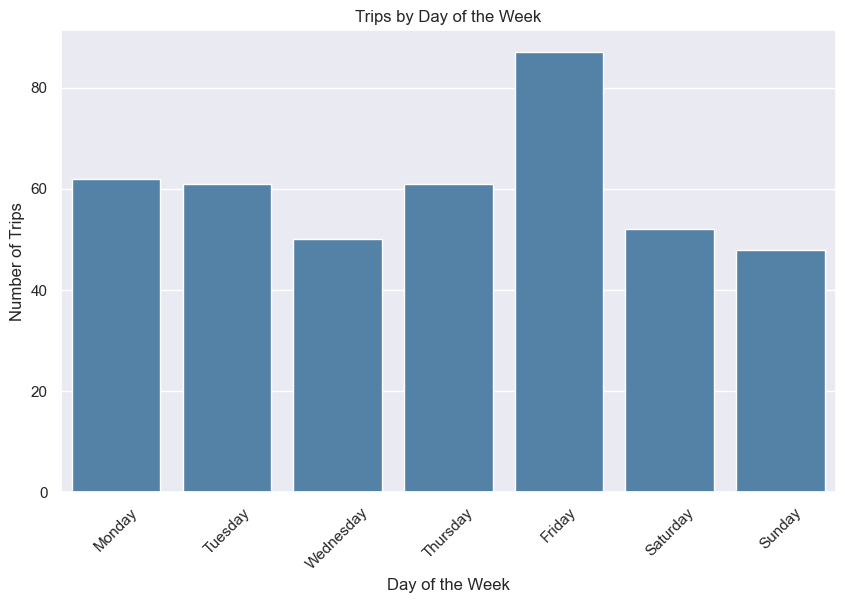

In [106]:
# Visualizes the number of trips for each day of the week using a bar chart.
plt.figure(figsize=(10, 6))
sns.countplot(data=uber_data, x='DAY_OF_WEEK', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], color='steelblue')
plt.title('Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

**Trips By Hour Of The Day**

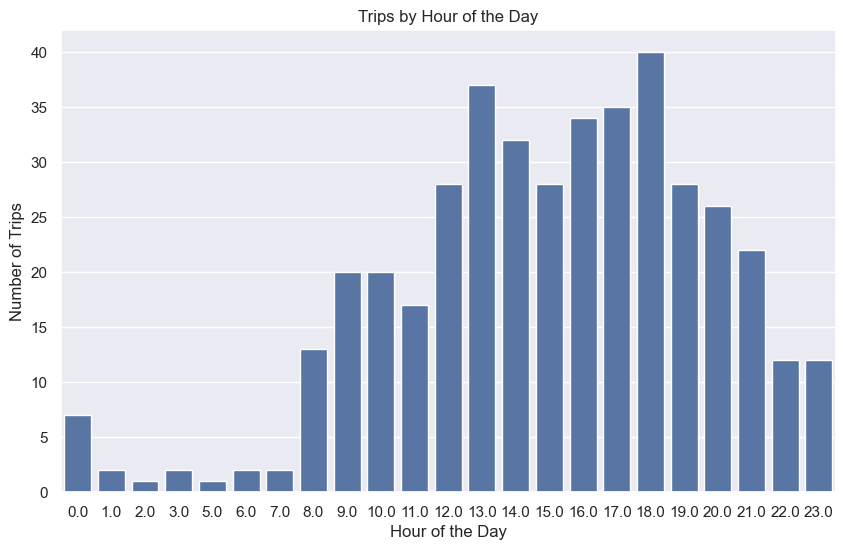

In [107]:
# Plots the distribution of trips across different hours of the day to identify peak times.
plt.figure(figsize=(10, 6))
sns.countplot(data=uber_data, x='HOUR', )
plt.title('Trips by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

**Distribution of Trip Distances**

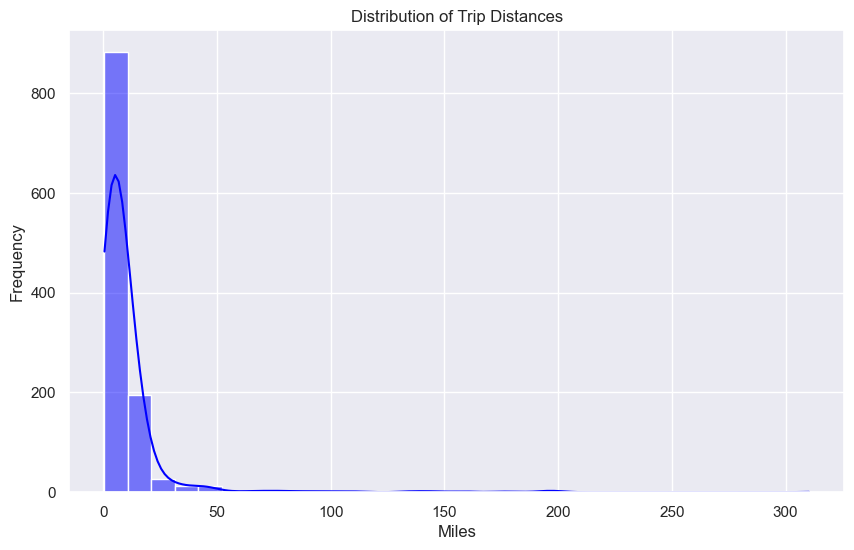

In [108]:
#  Average Trip Distance and Distribution
avg_miles = uber_data['MILES'].mean()

# Uses a histogram to display the distribution of trip distances
plt.figure(figsize=(10, 6))
sns.histplot(uber_data['MILES'], kde=True, bins=30, color='blue')
plt.title('Distribution of Trip Distances')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()

**Trip Category Distribution**

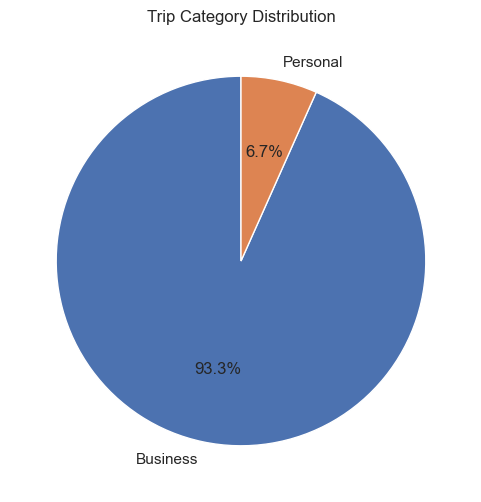

In [109]:
# Creates a pie chart to show the proportion of trips categorized as Business or Personal
plt.figure(figsize=(6, 6))
uber_data['CATEGORY'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Trip Category Distribution')
plt.ylabel('')
plt.show()

**Purpose Analysis**

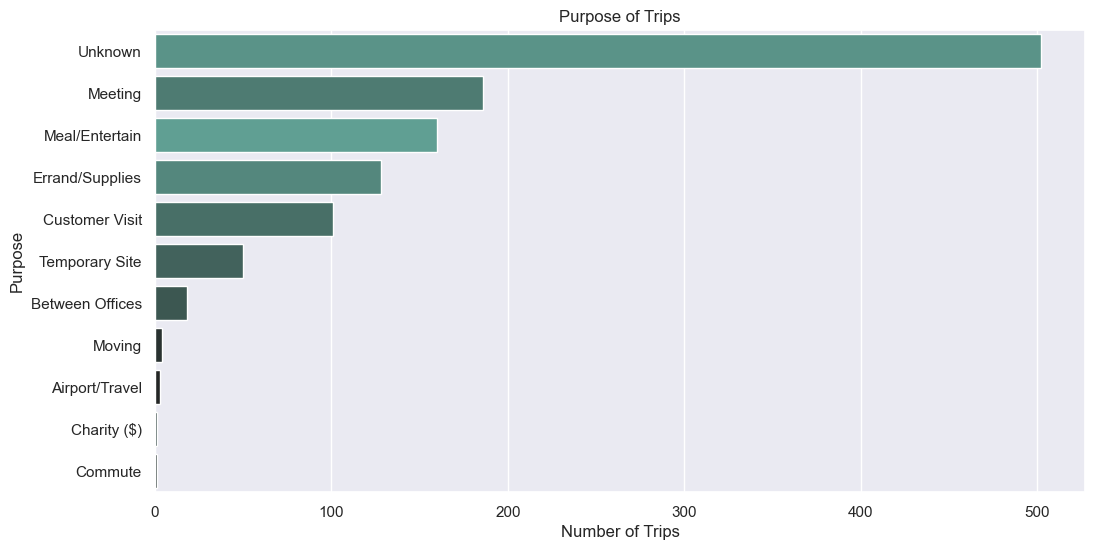

In [110]:
# Visualizes the distribution of trip purpose
plt.figure(figsize=(12, 6))
sns.countplot(data=uber_data, y='PURPOSE', order=uber_data['PURPOSE'].value_counts().index, hue='PURPOSE', palette='dark:#5A9_r')
plt.title('Purpose of Trips')
plt.xlabel('Number of Trips')
plt.ylabel('Purpose')
plt.show()

**Trips by Month**

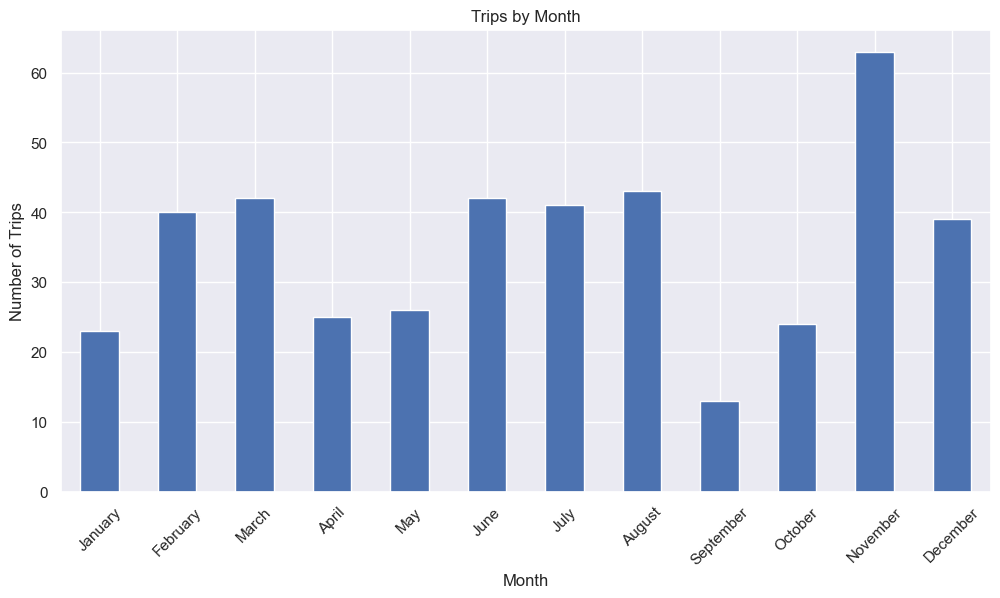

In [111]:
# Aggregates and plots the number of trips for each month using a Bar Chart
monthly_trends = uber_data.groupby(['MONTH']).size().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    fill_value=0
)

plt.figure(figsize=(12, 6))
monthly_trends.plot(kind='bar')
plt.title('Trips by Month')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

**Frequent Start and Stop Locations**

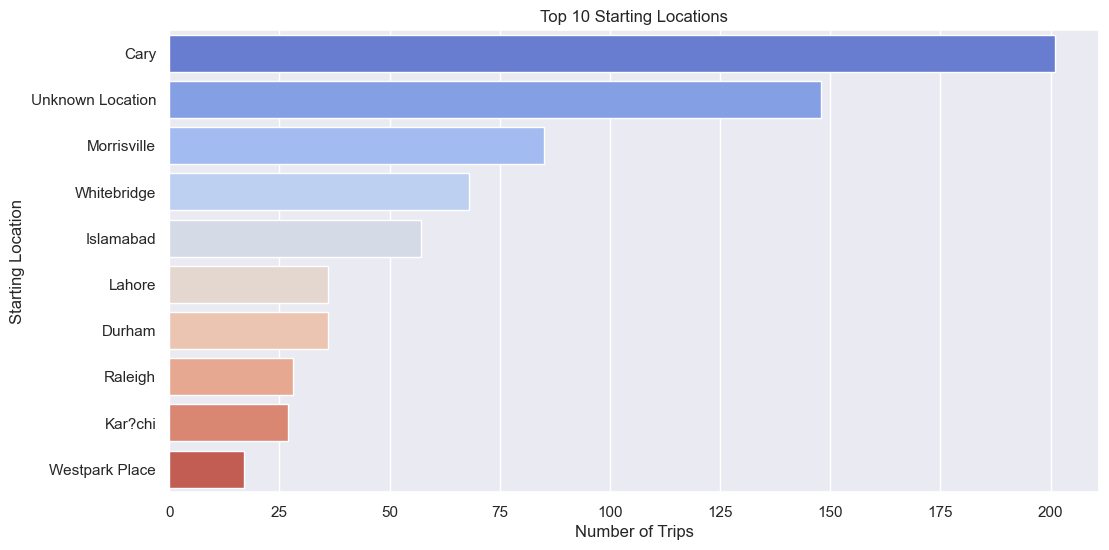

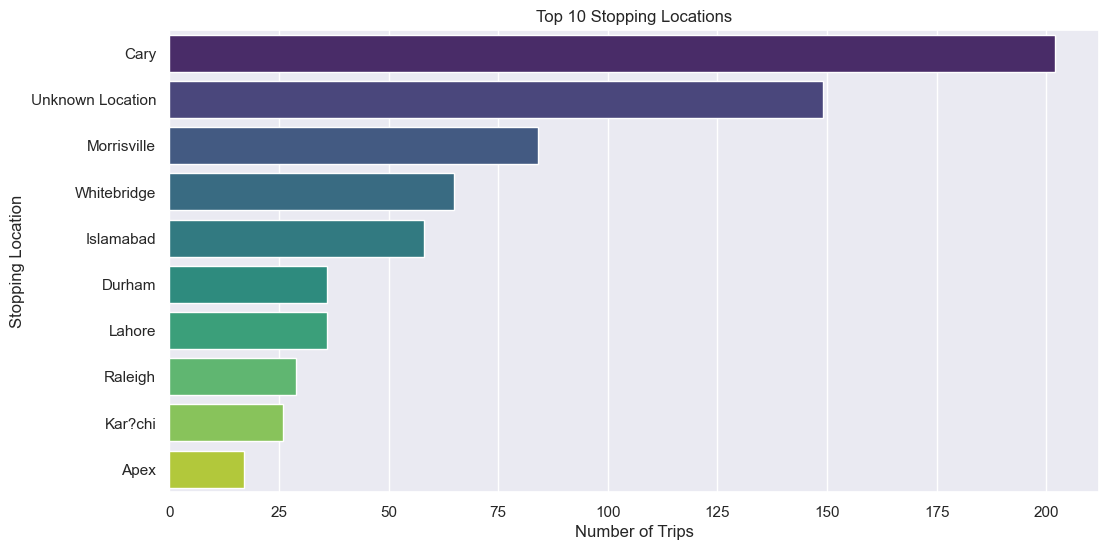

In [112]:
#  Identifies the top 10 starting and stopping locations and displays them using horizontal bar charts
top_start_locations = uber_data['START'].value_counts().head(10)
top_stop_locations = uber_data['STOP'].value_counts().head(10)

# Visualization: Frequent Start Locations
plt.figure(figsize=(12, 6))
sns.barplot(x=top_start_locations.values, y=top_start_locations.index, hue=top_start_locations.index, palette='coolwarm', legend=False)
plt.title('Top 10 Starting Locations')
plt.xlabel('Number of Trips')
plt.ylabel('Starting Location')
plt.show()

# Visualization: Frequent Stop Locations
plt.figure(figsize=(12, 6))
sns.barplot(x=top_stop_locations.values, y=top_stop_locations.index, hue=top_stop_locations.index, palette='viridis', legend=False)
plt.title('Top 10 Stopping Locations')
plt.xlabel('Number of Trips')
plt.ylabel('Stopping Location')
plt.show()

**Time of Day vs. Day of the Week**

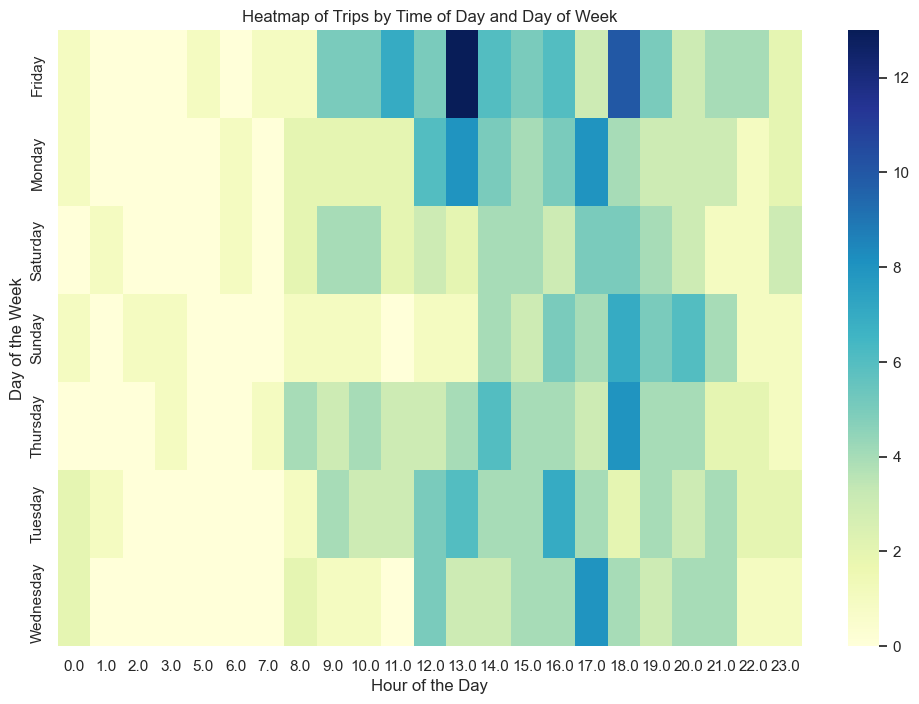

In [113]:
# Heatmap: Time of Day vs. Day of the Week
heatmap_data = uber_data.groupby(['DAY_OF_WEEK', 'HOUR']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False)
plt.title('Heatmap of Trips by Time of Day and Day of Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

**Distance by Purpose**

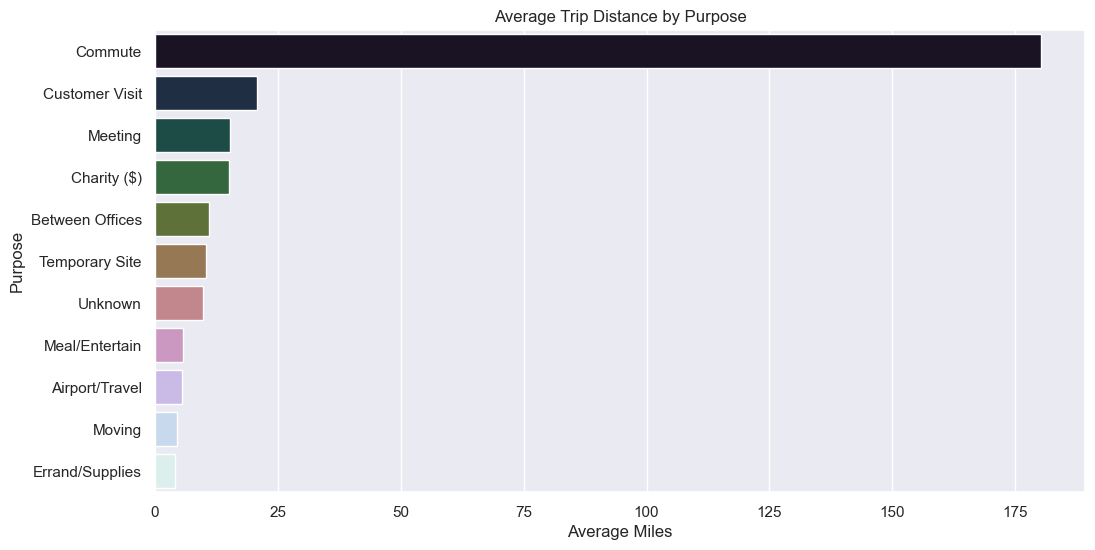

In [114]:
# Computes and plots the average trip distance for each trip purpose using a bar chart
purpose_miles = uber_data.groupby('PURPOSE')['MILES'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=purpose_miles.values, y=purpose_miles.index, hue=purpose_miles.index, palette='cubehelix')
plt.title('Average Trip Distance by Purpose')
plt.xlabel('Average Miles')
plt.ylabel('Purpose')
plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Unknown'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices'),
  Text(7, 0, 'Charity ($)'),
  Text(8, 0, 'Commute'),
  Text(9, 0, 'Moving'),
  Text(10, 0, 'Airport/Travel')])

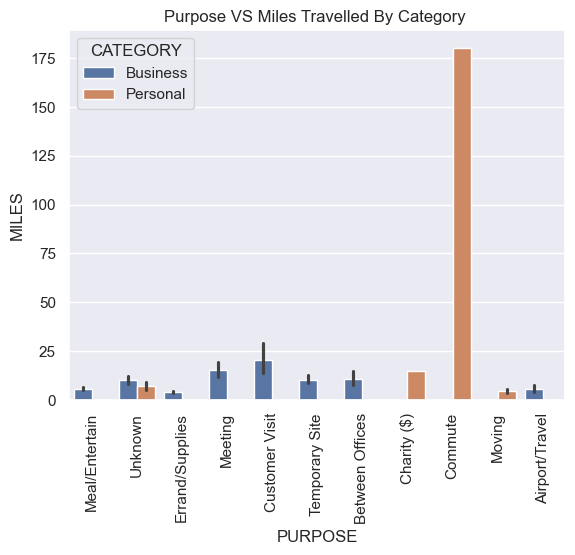

In [115]:
sns.barplot(x= uber_data["PURPOSE"], y= uber_data['MILES'],hue = uber_data["CATEGORY"])
plt.title("Purpose VS Miles Travelled By Category ")
plt.xticks(rotation=90)